In [1]:
# Import dependencies
%matplotlib inline
%pylab inline
# import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import numpy as np
import pandas as pd
import requests
import time

# Read American Airline and United Airline stock price data from excel files 
AMR_stock_data = pd.read_excel("StocksData/AMR.xlsx")
UAL_stock_data = pd.read_excel("StocksData/UAL.xlsx")
# use to_datetime function in mdates to re-format date
AMR_stock_data['New_Date'] = pd.to_datetime(AMR_stock_data['Date'].astype('str'))
UAL_stock_data['New_Date'] = pd.to_datetime(UAL_stock_data['Date'].astype('str'))
# AMR_stock_data.head(5)
# UAL_stock_data.head(5)

# Clean the columns, picking only date info and close price for AMR and UAL
AMR = AMR_stock_data[["New_Date","Price Alternate"]]
UAL = UAL_stock_data[["New_Date","Price Alternate"]]

# Set date value as an index
AMR = AMR.set_index('New_Date')
AMR['Date'] = AMR.index
AMR['Year'] = AMR.index.year
AMR['Month'] = AMR.index.month
AMR['Day'] = AMR.index.day
AMR['Weekday Name'] = AMR.index.weekday_name
#AMR.head()

UAL = UAL.set_index('New_Date')
UAL['Date'] = UAL.index
UAL['Year'] = UAL.index.year
UAL['Month'] = UAL.index.month
UAL['Day'] = UAL.index.day
UAL['Weekday Name'] = UAL.index.weekday_name
#UAL.head()


Populating the interactive namespace from numpy and matplotlib


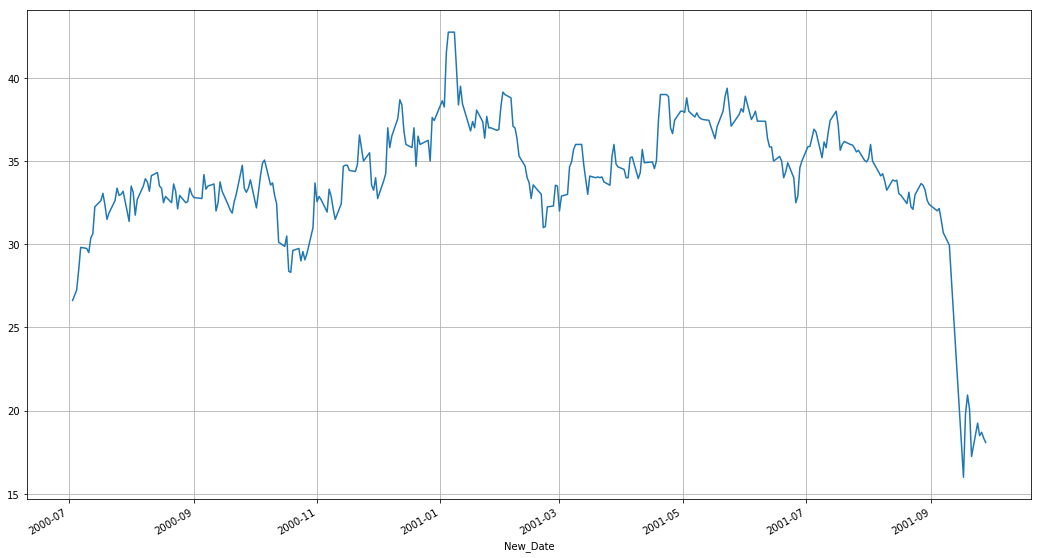

In [2]:
#set the time range
AMR_Trimmed = AMR[(AMR['Date'] > '2000-07-01') & (AMR['Date'] < '2001-09-30')]
AMR_Trimmed_df = pd.DataFrame(AMR_Trimmed)

# Control the default size of figures in this Jupyter notebook
pylab.rcParams['figure.figsize'] = (18, 10)
# Plot the closing price of AMR
AMR_Trimmed_df["Price Alternate"].plot(grid = True)

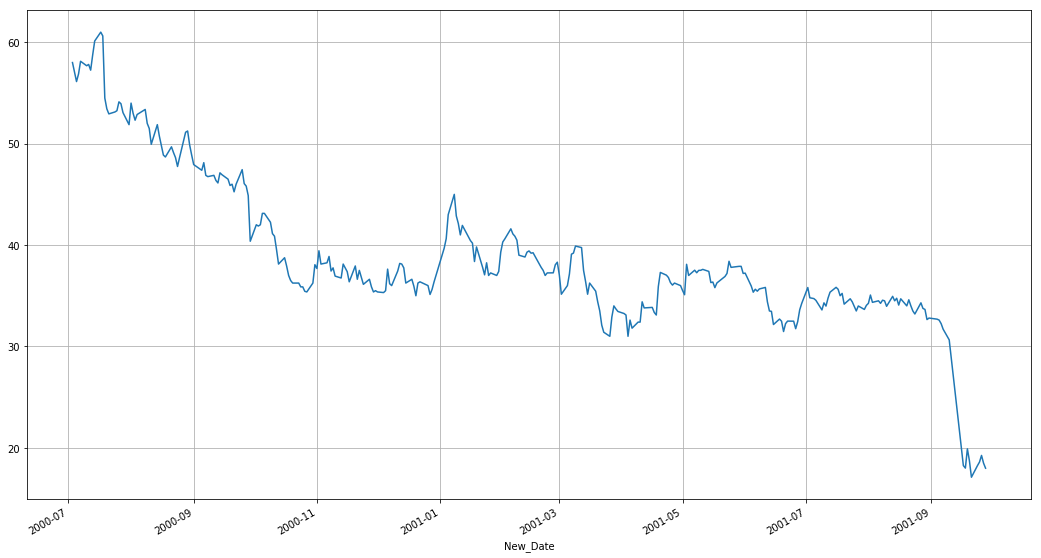

In [4]:
#set the time range
UAL_Trimmed = UAL[(UAL['Date'] > '2000-07-01') & (UAL['Date'] < '2001-09-30')]
UAL_Trimmed_df = pd.DataFrame(UAL_Trimmed)

# Change the size of plots
pylab.rcParams['figure.figsize'] = (18, 10)
# Plot the closing price of UAL
UAL_Trimmed_df["Price Alternate"].plot(grid = True)

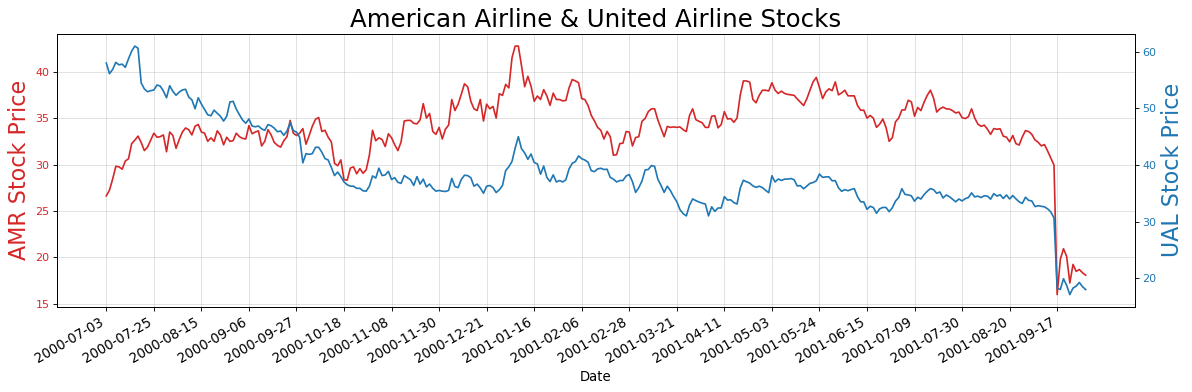

In [6]:
# merge two stocks' data info (pick the data within trimmed time range)
merged_data = pd.merge(AMR_Trimmed_df,UAL_Trimmed_df,on="Date",how='left')
# rename the columns titles
stocks_data = merged_data.rename(columns={"Price Alternate_x":"AMR_Stock_Price","Price Alternate_y":"UAL_Stock_Price"})
#export data into csv file
stocks_data.to_csv("Combined_Airline_Data.csv")

# plot, define the datasets and X, Y axises
x = stocks_data['Date'].astype('str')
y1 = stocks_data['AMR_Stock_Price']
y2 = stocks_data['UAL_Stock_Price']

# Plot Line1 (Left Y Axis); "plt.subplots" creates a figure and a grid of subplots with a single call
fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
ax1.plot(x, y1, color='tab:red')

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 
# Plot Line2 (Right Y Axis)
ax2.plot(x, y2, color='tab:blue')

# Decorations
# for ax1 (left Y axis)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
ax1.set_xlabel('Date', fontsize=12)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('AMR Stock Price', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
ax2.set_ylabel("UAL Stock Price", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 15))
ax2.set_xticklabels(x[::15], fontdict={'fontsize':6})
ax2.set_title("American Airline & United Airline Stocks", fontsize=22)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

# Take a Closer Look

Trimmed the date range to July.2001 - Sep 2001, which is 3-month prior to the tragedy

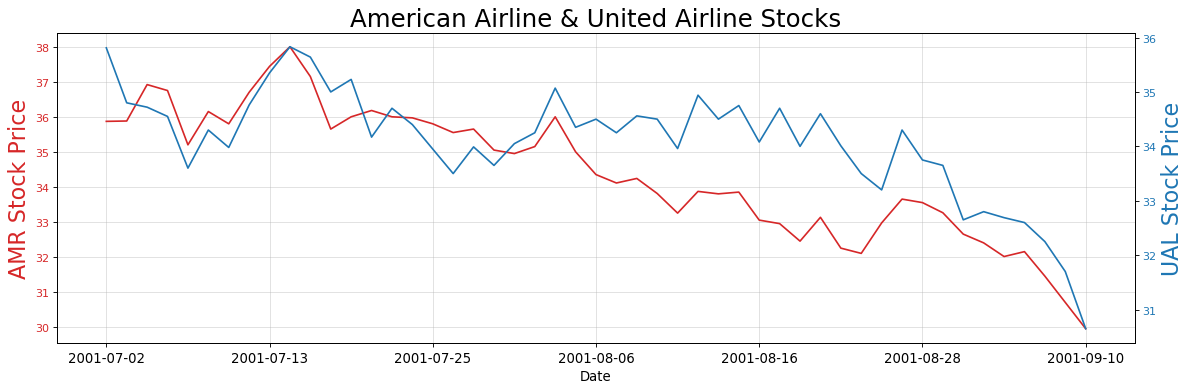

In [7]:
# #  Now take a closer look into Sep.2001
# reset time range for American Airline Stock
AMR_Sep = AMR[(AMR['Date'] > '2001-07-01') & (AMR['Date'] < '2001-09-15')]
AMR_Sep_df = pd.DataFrame(AMR_Sep)
# reset time range for United Airline Stock
UAL_Sep = UAL[(UAL['Date'] > '2001-07-01') & (UAL['Date'] < '2001-09-15')]
UAL_Sep_df = pd.DataFrame(UAL_Sep)

# merge two stock datassets into one dataset
merged_data = pd.merge(AMR_Sep_df,UAL_Sep_df,on="Date",how='left')
# rename columns
Sep_stocks_data = merged_data.rename(columns={"Price Alternate_x":"AMR_Stock_Price","Price Alternate_y":"UAL_Stock_Price"})
#export data into csv file
Sep_stocks_data.to_csv("Combined_Airline_Data_in_Sep.2001.csv")


# plot
x = Sep_stocks_data['Date'].astype('str')
y1 = Sep_stocks_data['AMR_Stock_Price']
y2 = Sep_stocks_data['UAL_Stock_Price']

# Plot Line1 (Left Y Axis)5
fig, ax1 = plt.subplots(1,1,figsize=(15,5), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.set_xlabel('Date', fontsize=12)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('AMR Stock Price', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
ax2.set_ylabel("UAL Stock Price", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 8))
ax2.set_xticklabels(x[::8], rotation=90, fontdict={'fontsize':6})
ax2.set_title("American Airline & United Airline Stocks", fontsize=22)
fig.tight_layout()
plt.show()